# Лабораторная работа №4. Проектирование и применение цифровых КИХ-фильтров

[1. Теоретические сведения](#ch_1)  
[1.1 Основные термины и определения](#ch_1_1)  
[1.2 Классификация цифровых фильтров](#ch_1_2)  
[1.3 Методы расчета цифровых фильтров](#ch_1_3)  
[1.4 Оконный метод](#ch_1_4)  
[1.5 Частотно-избирательные фильтры](#ch_1_5)  
[2. Основное задание](#ch_2)  
[2.1 Синтез частотно-избирательных КИХ-фильтров оконным методом](#ch_2_1)  
[2.2 Применение фильтра к сигналу](#ch_2_2)  
[3. Дополнительные задания](#ch_3)  
[4. Контрольные вопросы](#ch_4)  

## 1. Теоретические сведения <a id="ch_1"></a>

### 1.1 Основные термины и определения <a id="ch_1_1"></a>

Цифровые фильтры являются ключевыми компонентами в области цифровой обработки сигналов и используются для выполнения различных задач, таких как устранение шума, выделение сигналов определенной полосы частот и многого другого. Принципы работы цифровых фильтров основаны на математической обработке входных цифровых данных (сигналов) для получения желаемого выходного сигнала.  
***Цифровые фильтры*** являются *дискретными системами* и реализуются в программном или аппаратном обеспечении. Программная реализация может быть выполнена на процессорах общего назначения, цифровых сигнальных процессорах (DSP, Digital Signal Processors) или даже на FPGA (Field-Programmable Gate Arrays). Аппаратная реализация обеспечивает более высокую производительность за счет специализированного оборудования.  
***Дискретная система*** - это устройство или программа преобразования одного дискретного сигнала в другой по некоторому закону. У системы есть *вход* и *выход* (рисунок 1). На вход поступает одна последовательность отсчетов (например, $x(k)$), в результате обработки сигнала системой на ее выходе формируется другая последовательность отсчетов (например, $y(k)$).  

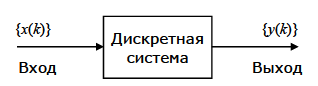  
*Рисунок 1 - Дискретная система*  

Принцип применения цифровых фильтров ко входному сигналу описывается ***разностным уравнением***:
$$
y(k) = b_{0}x(k)+b_{1}x(k-1)+...+b_{m}x(k-m)-a_{1}y(k-1)-a_{2}y(k-2)-...-a_{n}y(k-n) \tag{1},
$$
где $b_{i}$ и $a_{j}$ - *коэффициенты дискретного фильтра*. Формула *(1)* также называется *алгоритмом дискретной фильтрации*.  
***Порядок фильтра*** - это максимальная используемая при расчетах задержка, то есть $max(m, n)$.  

На рисунке 2 приведен пример цифрового фильтра "скользящего" среднего. Для него коэффициенты $b_{0},...,b_{3}$ равны 1/4. Остальные коэффициенты равны нулю. Порядок фильтра равен 4.  
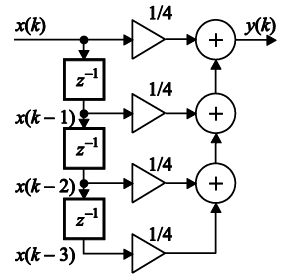  
*Рисунок 2 - Фильтр скользящего среднего*  
***Импульсная характеристика фильтра*** — это ответ фильтра на входной сигнал, представляющий собой идеальный импульс *дельта-функции*. Дельта-функция (или единичный импульс) характеризуется значением ноль во всех точках, кроме начала координат, где её значение бесконечно, при этом интеграл от дельта-функции по всей области определения равен единице. В контексте дискретных сигналов дельта-функция представляется как последовательность, где первый элемент равен единице, а все последующие — нулю.  
Ответ фильтра на такой сигнал показывает, как фильтр реагирует на внезапное кратковременное изменение входного сигнала и предоставляет полную информацию о характеристиках фильтра. Ведь любой входной сигнал можно представить как сумму сдвинутых и масштабированных импульсов, а выходной сигнал фильтра в этом случае будет являться суммой соответствующих сдвинутых и масштабированных импульсных характеристик.  
Таким образом, зная импульсную характеристику цифрового фильтра, можно точно предсказать его поведение для любого входного сигнала.  

### 1.2 Классификация цифровых фильтров <a id="ch_1_2"></a>

Цифровые фильтры классифицируются на основе своей импульсной характеристики на два основных типа: фильтры с конечной импульсной характеристикой (КИХ, FIR - Finite Impulse Response) и фильтры с бесконечной импульсной характеристикой (БИХ, IIR - Infinite Impulse Response).  

***КИХ-фильтры*** характеризуются конечной длительностью импульсной характеристики. Это означает, что ответ фильтра на единичный импульс ограничен определенным числом ненулевых значений.  

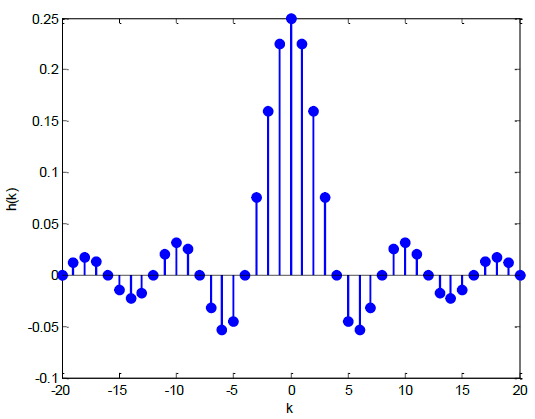  
*Рисунок 3 - Пример импульсной характеристики КИХ-фильтра*  

Разностное уравнение для КИХ-фильтра имеет вид:
$$
y(k) = b_{0}x(k)+b_{1}x(k-1)+...+b_{m}x(k-m) \tag{2}
$$
То есть значение любого отсчета выходного сигнала определяется взвешенной суммой предыдущих $m$ отсчетов, где коэффициенты $b_{i}$ - это веса. Формула (2) описывает операцию *свертку* входного сигнала с импульсной характеристикой фильтра. Понятие *свертки* уже вводилось в лабораторной работе №3. Формулу (2) можно описать, используя свертки:  
$$
y(k) = b*x = \sum_{i=0}^{m}b(i)\cdot x(k-i) \tag{3}.
$$ 

Важными свойствами КИХ-фильтров являются:
- ***линейность***: линейная фазовая характеристика, что делает их идеальными для приложений, где важно сохранение формы сигнала;
- ***устойчивость***: всегда устойчивы, поскольку их импульсная характеристика ограничена во времени;
- ***симметрия***: могут быть симметричными или антисимметричными, что позволяет точно контролировать амплитудно-частотную характеристики.  

КИХ-фильтры могут быть реализованы с использованием трех типов элементов:
- умножители на заданный коэффициент;
- сумматоры;
- блоки задержки.  

Реализация КИХ-фильтров обычно требует больше вычислительных ресурсов по сравнению с БИХ-фильтрами из-за необходимости обработки большего числа коэффициентов. Поэтому важным критерием в проектировании цифровых устройств является размер импульсной характеристики фильтра (или порядок фильтра). От него напрямую зависит сложность системы и плотность ее вычислительных операций.  

***БИХ-фильтры*** характеризуются тем, что их импульсная характеристика теоретически продолжается бесконечно. Эти фильтры могут быть получены путем цифровой аппроксимации аналоговых фильтров. В отличие от КИХ-фильтров, БИХ-фильтры используют один или несколько своих выходов в качестве входа, то есть имеют обратную связь. Математически это означает то, что хотя бы один из коэффициентов $a_{j}$ в формуле (1) ненулевой.  
Основные особенности БИХ-фильтров:  
- могут иметь как линейную, так и нелинейную фазовую характеристику;
- потенциально могут быть неустойчивымии, что требует тщательного проектирования и анализа;
- обеспечивают более крутые переходы между полосами пропускания и заграждения по сравнению КИХ-фильтрами при использовании меньшего числа коэффициентов, что делает их более эффективными с точки зрения вычислительных ресурсов.
В качестве примеров БИХ-фильтров можно выделить *фильтры Баттерворта*, *фильтры Чебышева*, *фильтры Калмана*, *фильтры Бесселя*, *эллиптические фильтры*.

### 1.3 Методы расчета цифровых фильтр <a id="ch_1_3"></a>ов

Под проектированием (или ***синтезом***) цифрового фильтра понимается нахождение таких коэффициентов $b_{i}$ и $a_{j}$ разностного уравнения, при которых характеристики фильтра удовлетворяют заданным требованиям. Если речь идет о цифровой обработке сигналов, то данные требования связаны с частотными характеристиками фильтра: *амплитудно-частотная характеристика (АЧХ)*  и *фазо-частотная характеристика (ФЧХ)*. Например, мы можем хотеть, чтобы фильтр одни частоты пропускал, а другие задерживал. Тогда требования задаются в виде желаемой АЧХ.  
Например, для проектирования *фильтра низких частот (ФНЧ)* необходимо задать требования к следующим его параметрам:  

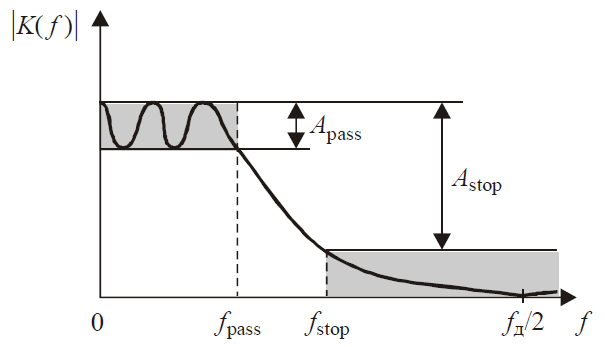  
*Рисунок 4 - Параметры, требуемые для проектирования ФНЧ*  

- $f_{д}$ - частота дискретизации;
- $f_{pass}$ - частота *среза* (граница полосы пропускания);
- $f_{stop}$ - частота *запирания* (граница полосы задерживания);
- $A_{pass}$ - допустимая неравномерность АЧХ в полосе пропускания (как правило задается в децибелах);
- $A_{stop}$ - требуемое подавление сигнала в полосе задерживания (как правило задается в децибелах).

Серые области на рисунке 4 демонстрируют допуски, в которые должна укладываться АЧХ фильтра в полосах пропускания и задерживания. Номинальное значение коэффициента передачи фильтра в полосе пропускания, как правило, равно единице (0 дБ).  

На рисунке 5 показана схема классификации методов синтеза цифровых фильтров.  
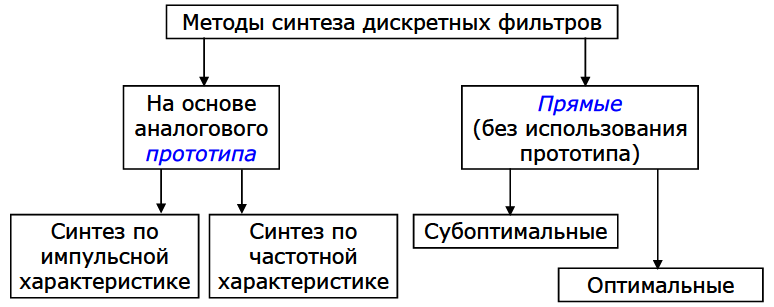  
Рисунок 5 - Классификация методов синтеза цифровых фильтров  

Главное разделение на две категории определяется тем, используется ли при расчете *аналоговый прототип*. Это физически реализуемая аналоговая цепь, на основе которой производится расчет дискретного фильтра, характеристики которого как-то связаны с характеритсиками прототипа.  
Данная лабораторная работа связана с использованием *прямых* методов синтеза цифровых фильтров. Эти методы можно разделить на несколько категорий:
- *оптимальные методы*, когда для достижения заданных характеристик фильтра используется математическая задача оптимизации;
- *субоптимальные методы*, не дающие в точности оптимального решения, но позволяющие значительно упростить вычисления по сравнению с оптимальными методами.

### 1.4 Оконный мето<a id="ch_1_4"></a>д 

Этот метод синтеза цифровых фильтров является субоптимальным. Его главная ценность в том, что он дает простую процедуру, пригодную для синтеза любых КИХ-фильтров. Каких-либо ограничений по типам частотных характеристик здесь нет.  
Идея оконного метода заключается в том, что мы получаем бесконечную импульсную характеристику идеального фильтра, из которой выделяется фрагмент конечной длительности с помощью *весовой функции*, которая часто называется *окном*.  
Простое усечение отсчетов импуьсной характеристики соответствует использованию *прямоугольного* окна. Примеры наиболее часто используемых оконных функций изображены на рисунке 6.  
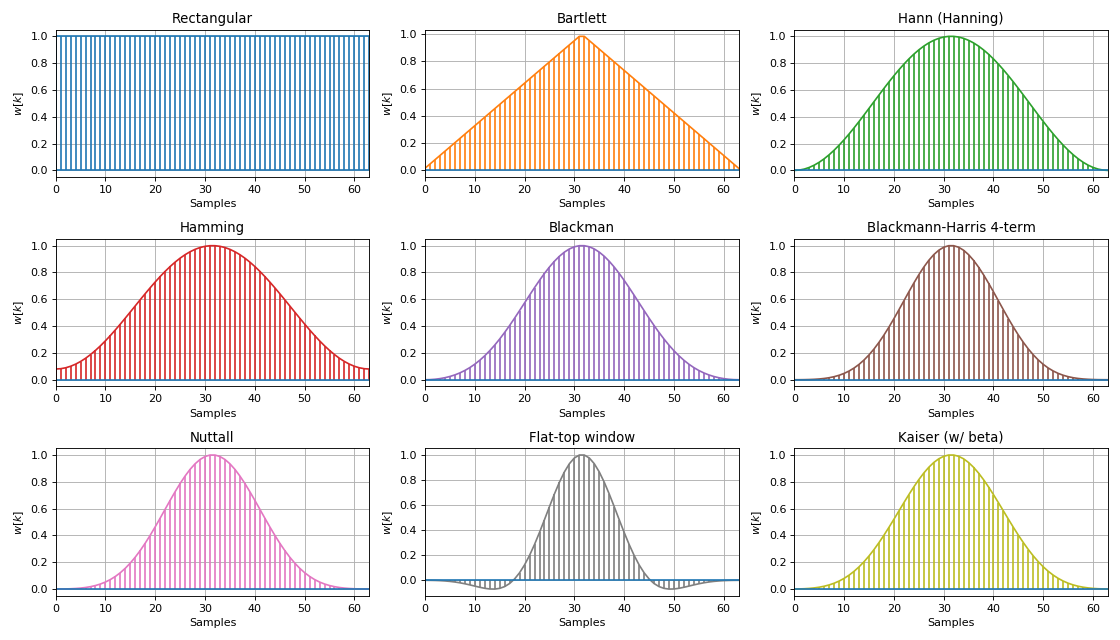  
*Рисунок 6 - Примеры оконных функций, используемых при при синтезе цифровых фильтров оконным методом*  



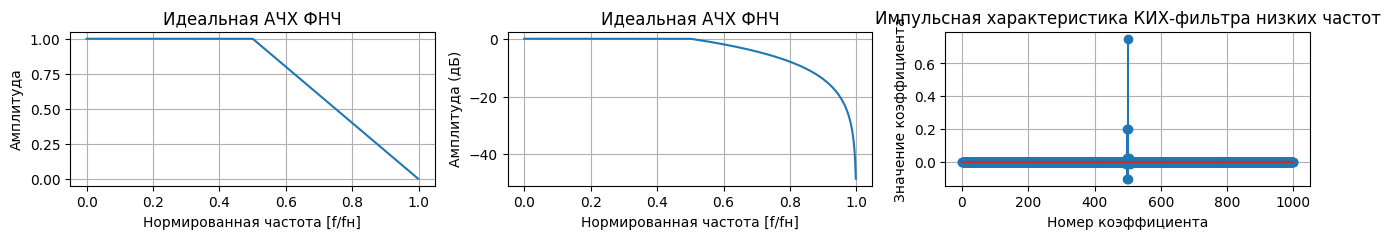

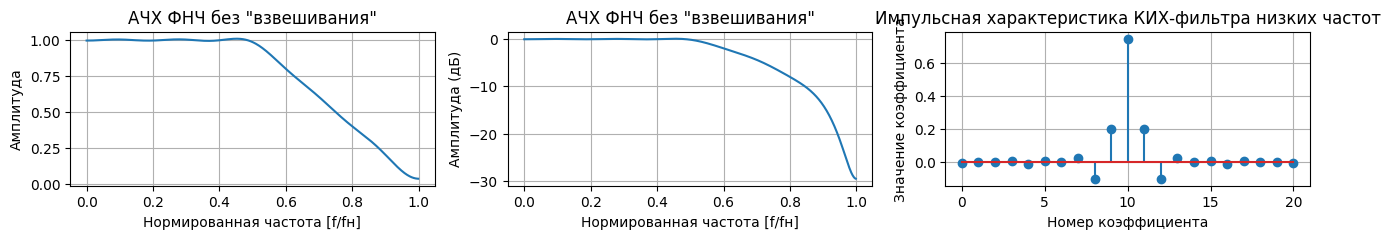

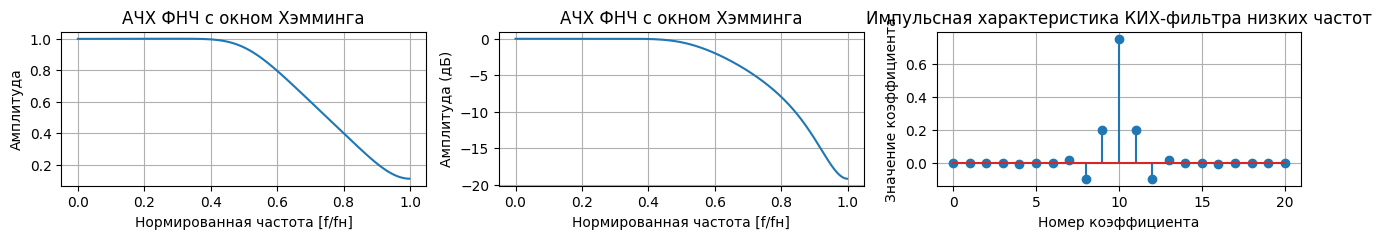

In [34]:
import numpy as np
from scipy.signal import firwin2, freqz, windows
import matplotlib.pyplot as plt

# Требования: 
# спроектировать ФНЧ с частотой среза, равной 0.5*fн (fн - частота Найквиста), с частотой запирания, равной fн
# Порядок фильтра Nf = 20

# Параметры фильтра
Nf = 20 + 1  # Количество коэффициентов фильтра (порядок фильтра + 1)

# Для демонстрации эффекта использования оконных функций рассматриваются 2 примера: 
# - с использованием прямоугольного окна
# - с использованием окна Хэмминга
window_types = ['boxcar', 'boxcar', 'hamming']
num_coefs = [1001, Nf, Nf]
titles = ['Идеальная АЧХ ФНЧ', 'АЧХ ФНЧ без "взвешивания"', 'АЧХ ФНЧ с окном Хэмминга']

for i in range(len(window_types)):

    # Создание FIR фильтра низких частот
    filter_coefs = firwin2(num_coefs[i], [0.0, 0.5, 1.0], [1.0, 1.0, 0.0], window=window_types[i])
    
    # Анализ характеристик фильтра
    w, h = freqz(filter_coefs)
    
    # Визуализация амплитудной характеристики фильтра
    plt.figure(figsize=(16, 2))
    plt.subplot(1,3,1)
    plt.plot(w/np.pi, abs(h))
    plt.title(titles[i])
    plt.xlabel('Нормированная частота [f/fн]')
    plt.ylabel('Амплитуда')
    plt.grid(True)
    
    plt.subplot(1,3,2)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)))
    plt.title(titles[i])
    plt.xlabel('Нормированная частота [f/fн]')
    plt.ylabel('Амплитуда (дБ)')
    plt.grid(True)
    
    # Визуализация импульсной характеристики фильтра
    plt.subplot(1,3,3)
    plt.stem(filter_coefs)
    plt.title('Импульсная характеристика КИХ-фильтра низких частот')
    plt.xlabel('Номер коэффициента')
    plt.ylabel('Значение коэффициента')
    plt.grid(True)
    
    plt.show()


### 1.5 Частотно-избирательные фильтры <a id="ch_1_5"></a>

***Частотно-избирательные фильтры*** — это фильтры, которые пропускают сигналы в определенном частотном диапазоне и подавляют сигналы вне этого диапазона.  
Основные типы частотно-избирательных фильтров:
1. ***Фильтры низких частот (ФНЧ)***: Пропускают сигналы с частотой ниже заданной граничной частоты и подавляют сигналы с частотой выше этой граничной частоты.
2. ***Фильтры высоких частот (ФВЧ)***: Пропускают сигналы с частотой выше заданной граничной частоты и подавляют сигналы с частотой ниже этой граничной частоты.
3. ***Полосовые фильтры***: Пропускают сигналы в определенном диапазоне частот между двумя граничными частотами и подавляют сигналы за пределами этого диапазона.
4. ***Режекторные (полосно-заграждающие) фильтры***: Подавляют сигналы в определенном диапазоне частот между двумя граничными частотами и пропускают сигналы за пределами этого диапазона.

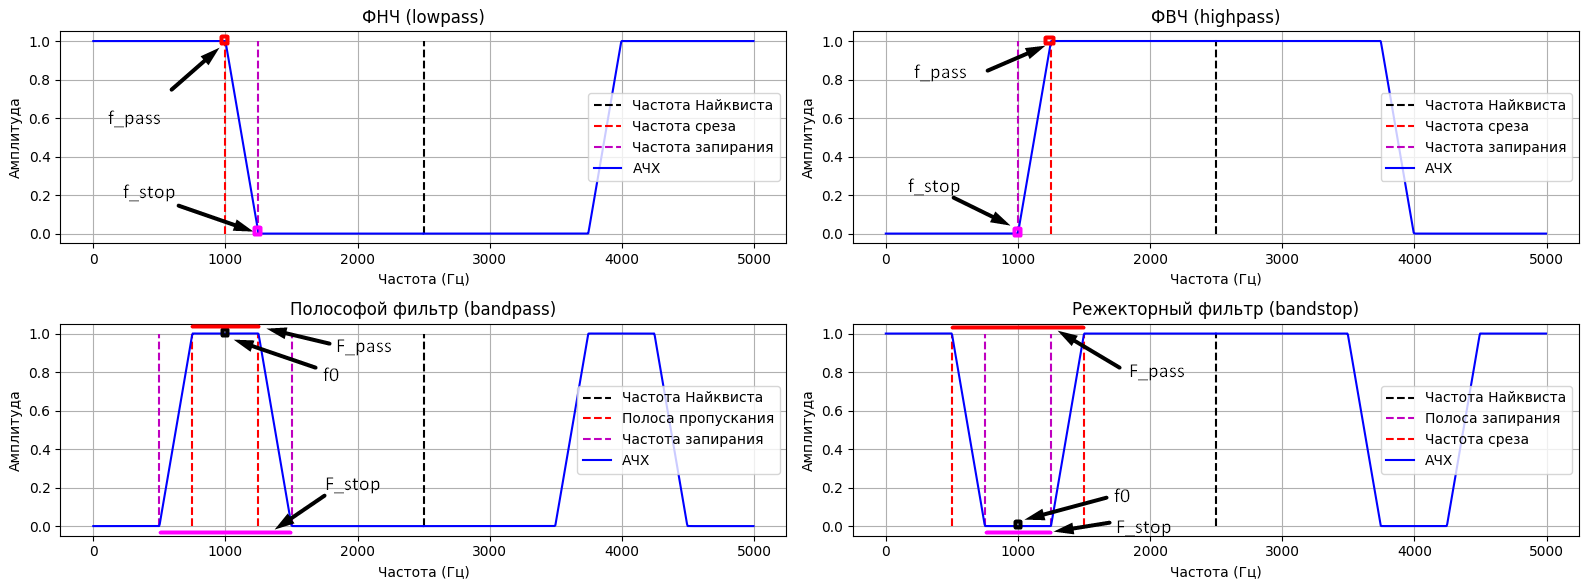  
Рисунок 7 - Идеальные амплитудно-частотные характеристики частотно-избирательных фильтров  

## 2. Основное задание <a id="ch_2"></a>

*Таблица 1 - Варианты заданий*  
|Номер по списку|Фильтр|$fs$|$f_{pass}$|$f_{stop}$|$f_{0}$|$F_{pass}$|$F_{stop}$|Окно|Порядок фильтра|Доп. задание|
|---|---|---|---|---|---|---|---|---|---|---|
|1,9,17,25|ФНЧ|720 Гц|150 Гц|220 Гц|-|-|-|tukey|16|1|
|2,10,18,26|ФВЧ|720 Гц|220 Гц|150 Гц|-|-|-|hann|18|2|
|3,11,19,27|Полосовой|720 Гц|-|-|150 Гц|100 Гц|170 Гц|hamming|20|3|
|4,12,20,28|Режекторный|720 Гц|-|-|150 Гц|170 Гц|100 Гц|blackman|22|4|
|5,13,21,29|ФНЧ|900 Гц|200 Гц|250 Гц|-|-|-|bartlett|24|1|
|6,14,22,30|ФВЧ|900 Гц|250 Гц|200 Гц|-|-|-|kaiser|26|2|
|7,15,23,31|Полосовой|900 Гц|-|-|200 Гц|160 Гц|240 Гц|tukey|30|3|
|8,16,24,32|Режекторный|900 Гц|-|-|200 Гц|240 Гц|160 Гц|hamming|32|4|

### 2.1 Синтез частотно-избирательных КИХ-фильтров оконным методом <a id="ch_2_1"></a>

1. Сформировать идеальные частотные характеристики КИХ-фильтра, согласно параметрам по варианту. Количество отсчетов взять достаточно большим (N > 1000). Ниже приведены примеры частотных характеристик ФНЧ.
2. Получить идеальную импульсную характеристику фильтра, применив ОБПФ к идеальной частотной характеристике фильтра.
3. Сделать "усечение" идеальной импульсной характеристики до размера, равного порядку фильтра + 1. Это необходимо сделать таким образом, чтобы в импульсной характеристике остались значимые отсчеты: нулевой отсчет, $N_{f}/2$ отсчетов из отрицательной области и $N_{f}/2$ отсчетов из положительной области (подобно тому, как мы это делали в лабораторной работе №2 в задании с комплексной гармонической вырезкой).
4. Построить частотные характеристики фильтра, соответствующие усеченной импульсной характеристике.
5. Применить оконную функцию к импульсной характеристике (взвешивание). Для этого усеенную импульсную характеристику необходимо поэлементно умножить на массив соответствующей оконной функции нужного размера. Изобразить на графике усеченную импульсную характеристику фильтра до и после взвешивания, а также саму оконную функцию.
6. Построить частотные характеристики фильтра, соответствующие усеченной взыешенной импульсной характеристике. Проанализировать результаты и сделать выводы.
7. Изучить возможности пакета *scipy.signal.firwin2* для задачи синтеза КИХ-фильтра оконным методом. Синтезировать фильтр, используя функцию *firwin2*.
8. Убедиться в идентичности результатов, полученных на этапах 6 и 7.

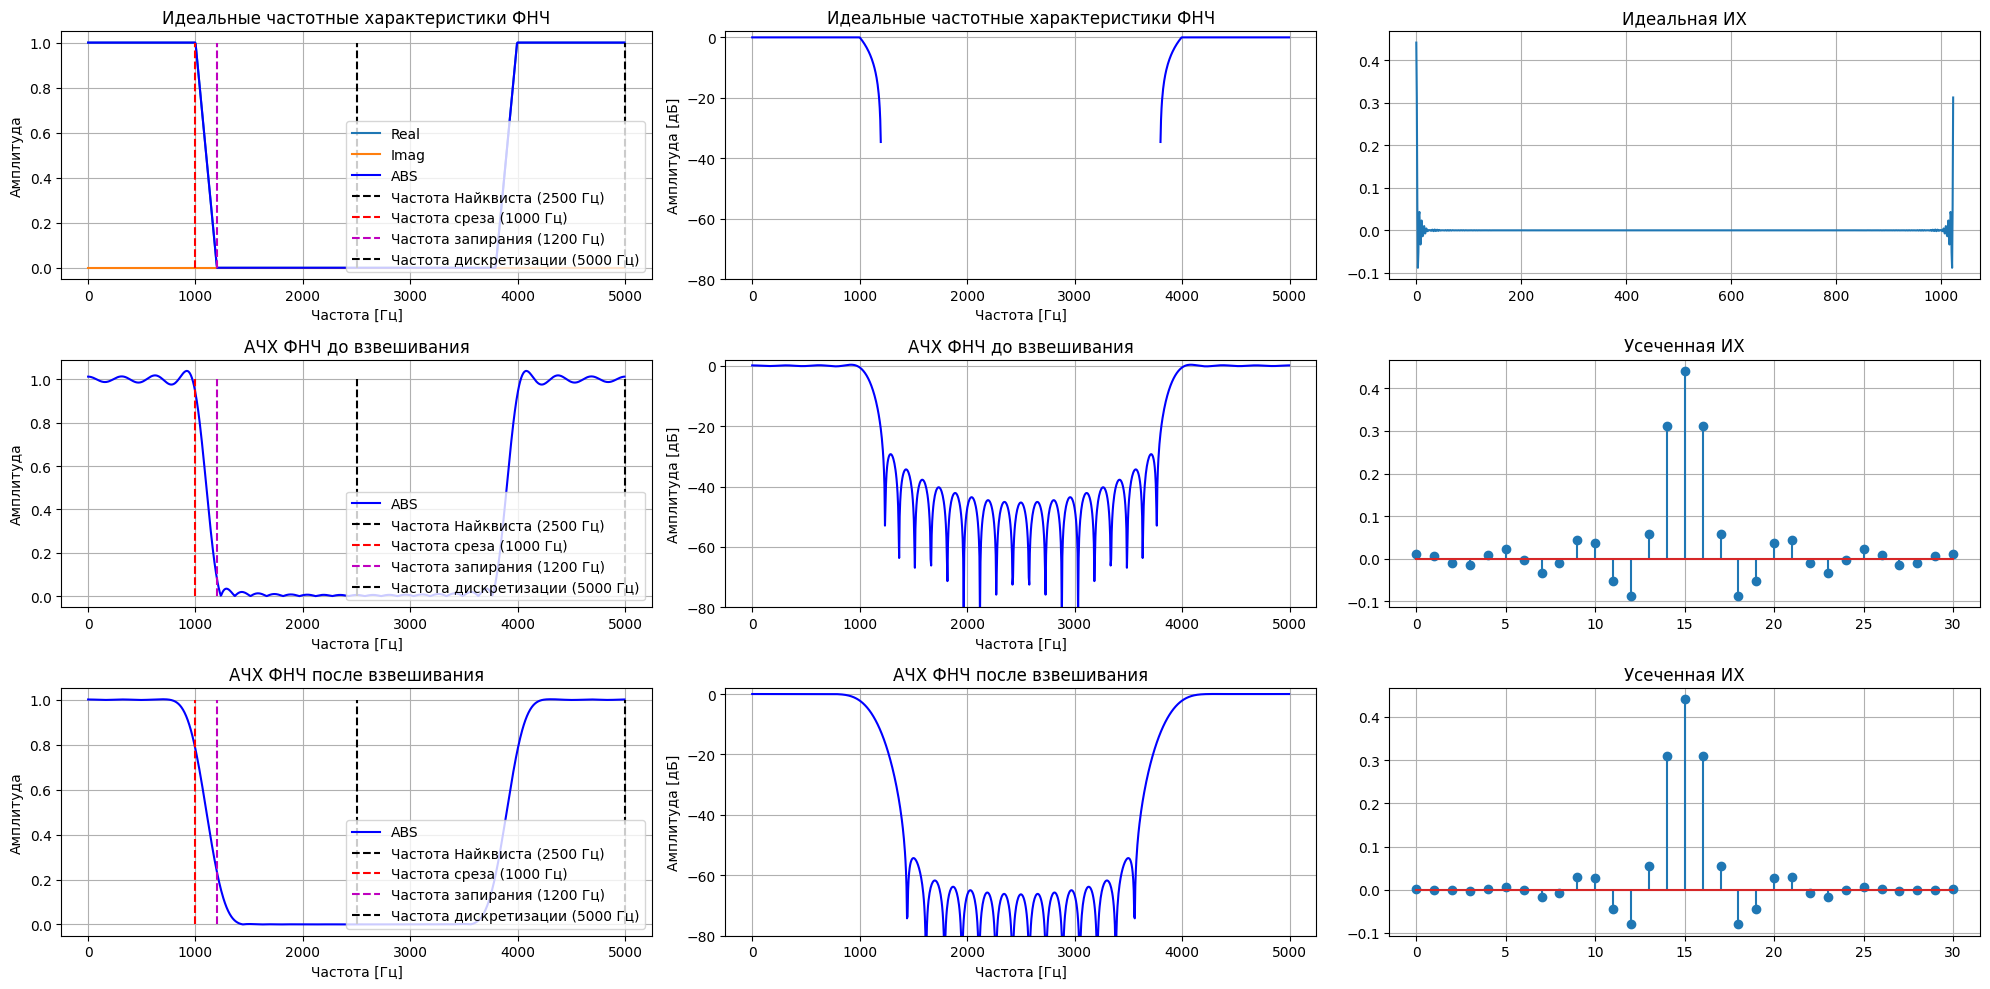  
*Рисунок 8 - Пример синтеза ФНЧ*  

### 2.2 Применение фильтра к сигналу <a id="ch_2_2"></a>

1. Сформировать сигнал, состоящий из двух гармоник разных амплитуд, как мы это делали в лабораторной работе №2. При этом, одна гармоника должна быть из области частот пропускания вашего КИХ-фильтра, а вторая - из области частот запирания.
2. Применить разработанный фильтр к сигналу во временной области (исользуя свертку, *np.convolve()*).
3. Построить графики сигнала во временной и в частотной областях до и после применения фильтра. Проанализировать результаты и сделать выводы.

## 3. Дополнительные задания <a id="ch_3"></a>

1. Синтезировать *дифференцирующий фильтр* оконным методом одним из способов из задания 2.1. Проверить работу фильтра, применив его к сигналу.
2. Синтезировать *фильтр Гильберта* оконным методом одним из способов из задания 2.1. Проверить работу фильтра, применив его к сигналу.
3. Написать функцию, реализующую алгоритм свертки. Добиться идентичности результатов с функцией *np.convolve()*.
4. В задании 2.2 выполнить фильтрацию в частотной области, используя БПФ, ОДПФ их свойства. Убедиться в идентичности результатов при фильтрации во временной и в частотной областях.

## 4. Контрольные вопросы <a id="ch_4"></a>

1. Что такое динамическая система?
2. Что такое цифровой фильтр? Что такое КИХ-фильтр? БИХ-фильтр? В чем их преимущества и недостатки?
3. Что такое импульсная характеристика фильтра?
4. Что такое синтез цифрового фильтра? Как классифицируются методы синтеза цифровых фильтров?
5. Что такое разностное уравнение?
6. Что такое порядок фильтра?
7. В чем суть оконного метода?
8. Какие вы знаете частотно избирательные фильтры?
9. Какие идеальные частотные характеристики у фильтра Гильберта?
10. Какие идеальные частотные характеристики у дифференцирующего фильтра?
11. Каким образом можно применить фильтр к сигналу?
12. На какие характеристики обращают внимание при проектировании цифровых фильтров? Как устанавливаются требования к этим характеристикам?

